In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [2]:
rmsd_cort_wt = pd.read_csv("./rmsd_cort_wt_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_cort_wt = pd.read_csv("./rmsf_cort_wt_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_pred_wt = pd.read_csv("./rmsd_pred_wt_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) #['Total Volume (A3)']
rmsf_pred_wt = pd.read_csv("./rmsf_pred_wt_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_dex_wt  =  pd.read_csv("./rmsd_dex_wt_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_dex_wt  =  pd.read_csv("./rmsf_dex_wt_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_dibC_wt = pd.read_csv("./rmsd_dibC_wt_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_dibC_wt = pd.read_csv("./rmsf_dibC_wt_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_cort_f602s = pd.read_csv("./rmsd_cort_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_cort_f602s = pd.read_csv("./rmsf_cort_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_pred_f602s = pd.read_csv("./rmsd_pred_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value'])
rmsf_pred_f602s = pd.read_csv("./rmsf_pred_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_dex_f602s  = pd.read_csv("./rmsd_dex_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_dex_f602s  = pd.read_csv("./rmsf_dex_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 

rmsd_dibC_f602s = pd.read_csv("./rmsd_dibC_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=18, names=['frame','value']) 
rmsf_dibC_f602s = pd.read_csv("./rmsf_dibC_f602s_md1us1_dt100.xvg",sep='\s+', skiprows=17, names=['residue','value']) 



In [17]:
rmsf_dibC_wt.iloc[1090:1091,:]

,residue,value
0,1,0.5360
1,2,0.3751
2,3,0.1697
3,4,0.1194
4,5,0.1086
...,...,...
259,260,0.1777
260,261,0.2963
261,262,0.2726
262,263,0.4087


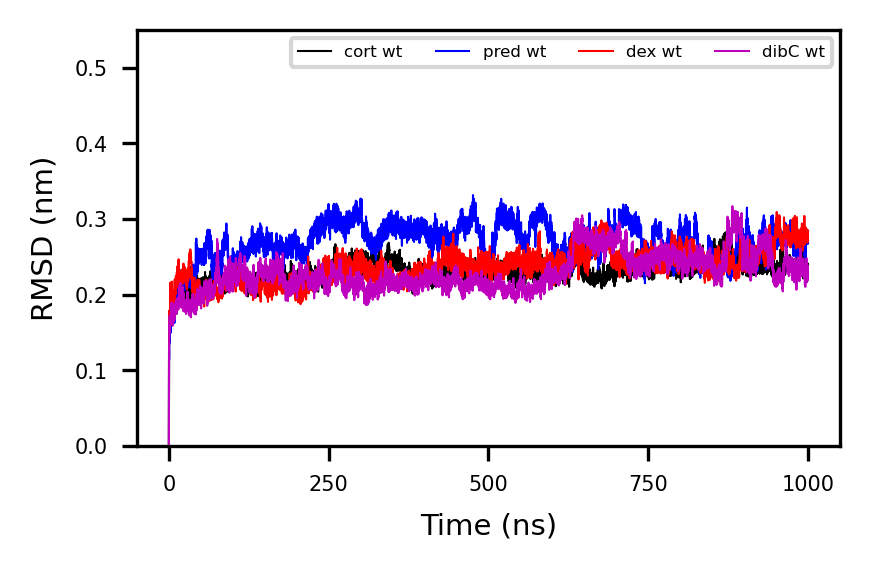

In [232]:
fig, axs = plt.subplots(ncols=1,figsize=(3,2),dpi=300)

axs.plot(rmsd_cort_wt['frame']/1000, rmsd_cort_wt['value'], linestyle='-', color='black',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_pred_wt['frame']/1000, rmsd_pred_wt['value'], linestyle='-', color='blue',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_dex_wt['frame']/1000, rmsd_dex_wt['value'], linestyle='-', color='red',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_dibC_wt['frame']/1000, rmsd_dibC_wt['value'], linestyle='-', color='m',markersize=5,linewidth=0.5,label=None)

plt.legend(['cort wt','pred wt','dex wt','dibC wt'],ncol=4,prop={"size":4},loc='upper right')

plt.xticks(fontsize=5);
plt.yticks(np.arange(0,0.6,0.1),fontsize=5);
plt.ylim([0, 0.55])

    
plt.ylabel('RMSD (nm)', fontsize=7)
plt.xlabel('Time (ns)', fontsize=7)    

plt.tight_layout()
    
plt.savefig('rmsd_time_gr_wt.pdf', format = 'pdf')

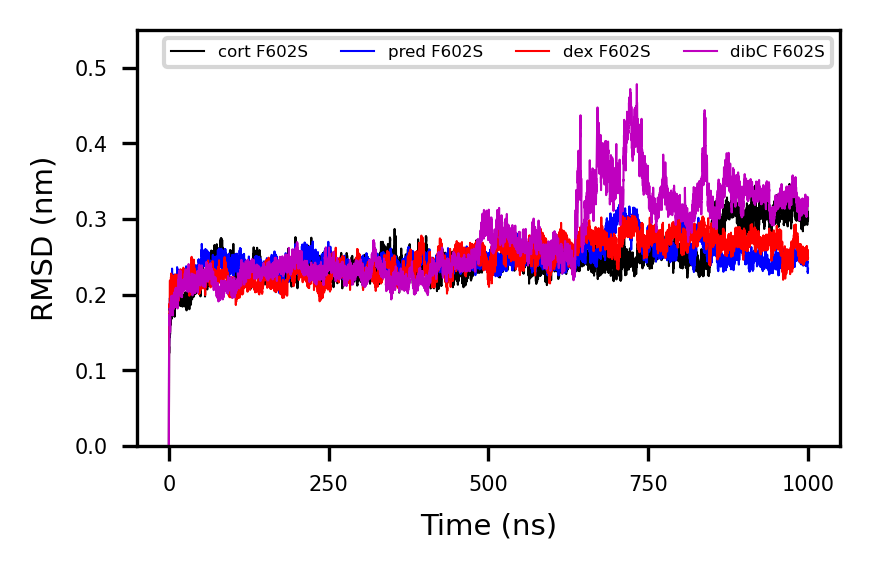

In [233]:
fig, axs = plt.subplots(ncols=1,figsize=(3,2),dpi=300)

axs.plot(rmsd_cort_f602s['frame']/1000, rmsd_cort_f602s['value'], linestyle='-', color='black',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_pred_f602s['frame']/1000, rmsd_pred_f602s['value'], linestyle='-', color='blue',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_dex_f602s['frame']/1000, rmsd_dex_f602s['value'], linestyle='-', color='red',markersize=5,linewidth=0.5,label=None)
axs.plot(rmsd_dibC_f602s['frame']/1000, rmsd_dibC_f602s['value'], linestyle='-', color='m',markersize=5,linewidth=0.5,label=None)

plt.legend(['cort F602S','pred F602S','dex F602S','dibC F602S'],ncol=4,prop={"size":4},loc='upper right')

plt.xticks(fontsize=5);
plt.yticks(np.arange(0,0.6,0.1),fontsize=5);
plt.ylim([0, 0.55])
    
plt.ylabel('RMSD (nm)', fontsize=7)
plt.xlabel('Time (ns)', fontsize=7)    

plt.tight_layout()
    
plt.savefig('rmsd_time_gr_f602.pdf', format = 'pdf')

In [234]:
def binning (min_bin,max_bin,step, values):
    #step =10            
    bins=np.arange(min_bin,max_bin+step,step)#.tolist()
    
    y, bins_arr = np.histogram(values, bins)
    y_norm = (y/y.sum())*100
    return y, y_norm, bins_arr

In [235]:
df_cort_wt_dt100_y, df_cort_wt_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_cort_wt['value'])
df_pred_wt_dt100_y, df_pred_wt_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_pred_wt['value'])
df_dex_wt_dt100_y, df_dex_wt_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_dex_wt['value'])
df_dibC_wt_dt100_y, df_dibC_wt_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_dibC_wt['value'])


df_cort_f602s_dt100_y, df_cort_f602s_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_cort_f602s['value'])
df_pred_f602s_dt100_y, df_pred_f602s_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_pred_f602s['value'])
df_dex_f602s_dt100_y, df_dex_f602s_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_dex_f602s['value'])
df_dibC_f602s_dt100_y, df_dibC_f602s_dt100_y_norm, bins_arr = binning (0.15,0.4,0.005, rmsd_dibC_f602s['value'])

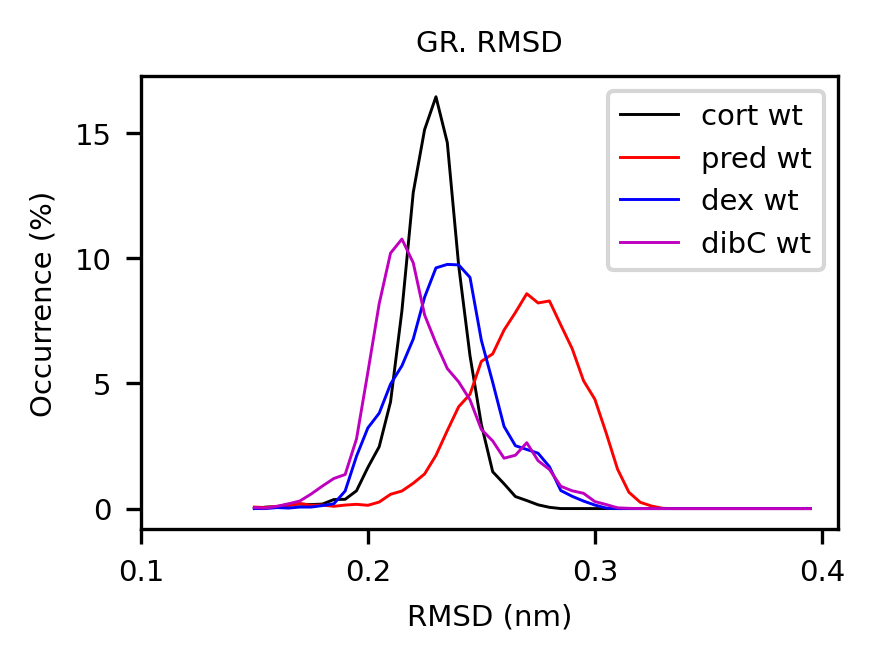

In [236]:
fig, ax = plt.subplots(figsize=(3,2),dpi=300)

colors=['forestgreen','lime','blue','cornflowerblue']

ax.plot(bins_arr[:-1], df_cort_wt_dt100_y_norm, marker=None,markersize=.1,color='k',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_pred_wt_dt100_y_norm, marker=None,markersize=.1,color='r',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dex_wt_dt100_y_norm, marker=None,markersize=.1,color='b',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dibC_wt_dt100_y_norm, marker=None,markersize=.1,color='m',linestyle='-',linewidth=0.7)


plt.legend(['cort wt', 'pred wt','dex wt', 'dibC wt'],loc='upper right',prop={"size":7})
plt.ylabel('Occurrence (%)',fontsize=7)
plt.xlabel('RMSD (nm)',fontsize=7);

plt.title( 'GR. RMSD', fontsize = 7)

plt.yticks(fontsize=7);
plt.xticks(np.arange(0.1,0.5,0.1),fontsize=7);

#plt.xlim([56000, 59000])

#plt.xticks(bins_arr[::1]-10/2,bins_arr[::1],fontsize=7, rotation=45)
#plt.yticks(range(0,21,5),fontsize=15);

plt.savefig('rmsd_hist_gr_wt.pdf', format = 'pdf')

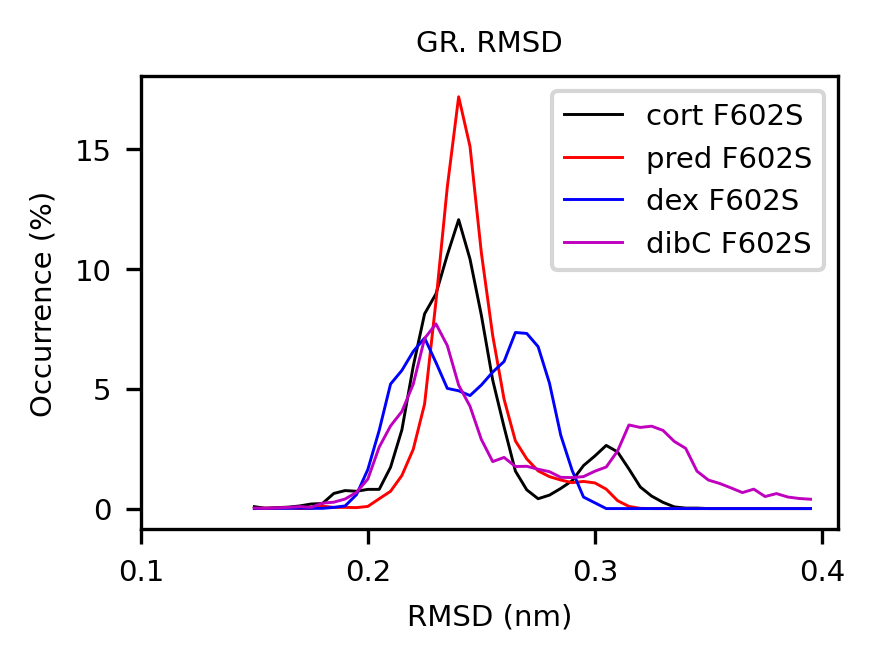

In [237]:
fig, ax = plt.subplots(figsize=(3,2),dpi=300)

colors=['forestgreen','lime','blue','cornflowerblue']

ax.plot(bins_arr[:-1], df_cort_f602s_dt100_y_norm, marker=None,markersize=.1,color='k',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_pred_f602s_dt100_y_norm, marker=None,markersize=.1,color='r',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dex_f602s_dt100_y_norm, marker=None,markersize=.1,color='b',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dibC_f602s_dt100_y_norm, marker=None,markersize=.1,color='m',linestyle='-',linewidth=0.7)


plt.legend(['cort F602S', 'pred F602S','dex F602S', 'dibC F602S'],loc='upper right',prop={"size":7})
plt.ylabel('Occurrence (%)',fontsize=7)
plt.xlabel('RMSD (nm)',fontsize=7);

plt.title( 'GR. RMSD', fontsize = 7)

plt.yticks(fontsize=7);
plt.xticks(np.arange(0.1,0.5,0.1),fontsize=7);

#plt.xlim([56000, 59000])

#plt.xticks(bins_arr[::1]-10/2,bins_arr[::1],fontsize=7, rotation=45)
#plt.yticks(range(0,21,5),fontsize=15);

plt.savefig('rmsd_hist_gr_f602s.pdf', format = 'pdf')

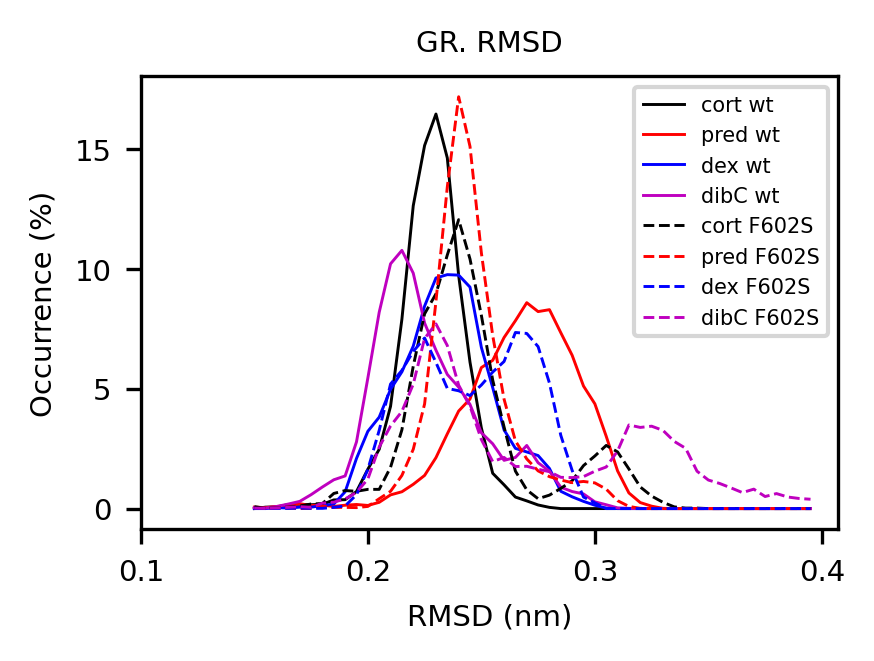

In [238]:
fig, ax = plt.subplots(figsize=(3,2),dpi=300)

colors=['forestgreen','lime','blue','cornflowerblue']

ax.plot(bins_arr[:-1], df_cort_wt_dt100_y_norm, marker=None,markersize=.1,color='k',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_pred_wt_dt100_y_norm, marker=None,markersize=.1,color='r',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dex_wt_dt100_y_norm, marker=None,markersize=.1,color='b',linestyle='-',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dibC_wt_dt100_y_norm, marker=None,markersize=.1,color='m',linestyle='-',linewidth=0.7)

ax.plot(bins_arr[:-1], df_cort_f602s_dt100_y_norm, marker=None,markersize=.1,color='k',linestyle='--',linewidth=0.7)
ax.plot(bins_arr[:-1], df_pred_f602s_dt100_y_norm, marker=None,markersize=.1,color='r',linestyle='--',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dex_f602s_dt100_y_norm, marker=None,markersize=.1,color='b',linestyle='--',linewidth=0.7)
ax.plot(bins_arr[:-1], df_dibC_f602s_dt100_y_norm, marker=None,markersize=.1,color='m',linestyle='--',linewidth=0.7)

plt.legend(['cort wt', 'pred wt','dex wt', 'dibC wt','cort F602S', 'pred F602S','dex F602S', 'dibC F602S'],loc='upper right',prop={"size":5})
plt.ylabel('Occurrence (%)',fontsize=7)
plt.xlabel('RMSD (nm)',fontsize=7);

plt.title( 'GR. RMSD', fontsize = 7)

plt.yticks(fontsize=7);
plt.xticks(np.arange(0.1,0.5,0.1),fontsize=7);

#plt.xlim([56000, 59000])

#plt.xticks(bins_arr[::1]-10/2,bins_arr[::1],fontsize=7, rotation=45)
#plt.yticks(range(0,21,5),fontsize=15);

plt.savefig('rmsd_hist_gr_wt_f602s.pdf', format = 'pdf')

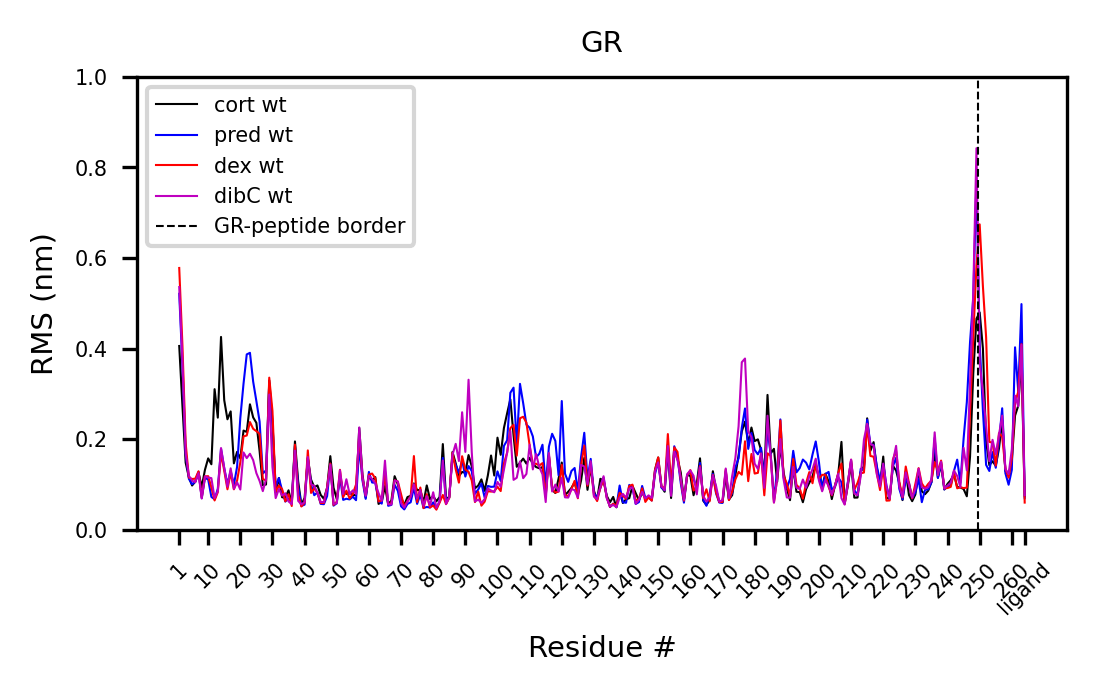

In [239]:
fig, ax = plt.subplots(figsize=(4,2),dpi=300)

#colors=['forestgreen','lime','blue','cornflowerblue']

ax.plot(rmsf_cort_wt['residue'], rmsf_cort_wt['value'],color='k',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_pred_wt['residue'], rmsf_pred_wt['value'],color='b',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_dex_wt['residue'], rmsf_dex_wt['value'],color='r',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_dibC_wt['residue'], rmsf_dibC_wt['value'],color='m',linestyle='-',linewidth=0.5, marker=None,markersize=.3)


# ax.plot(bins_arr[:-1], df_pred_wt_dt100_y_norm, marker='.',markersize=.1,color='r',linestyle='-')
# ax.plot(bins_arr[:-1], df_dex_wt_dt100_y_norm, marker='.',markersize=.1,color='b',linestyle='-')
# ax.plot(bins_arr[:-1], df_dibC_wt_dt100_y_norm, marker='.',markersize=.1,color='m',linestyle='-')

plt.plot([249.5,249.5],[0,1],'k--',linewidth =0.5)

plt.legend(['cort wt', 'pred wt','dex wt', 'dibC wt','GR-peptide border'],loc='upper left',prop={"size":5})
plt.ylabel('RMS (nm)',fontsize=7)
plt.xlabel('Residue #',fontsize=7);

plt.title( 'GR', fontsize = 7);

plt.ylim((0, 1))
#plt.xlim((248, 255))


labels0 = np.insert(np.arange(10,270,10), 0, 1, axis=0)
labels = np.insert(labels0, -1, 264, axis=0)

plt.xticks(labels,rotation = 45,fontsize=5);
plt.yticks(fontsize=5);

a=ax.get_xticks().tolist()
a[-2]='ligand'
ax.set_xticklabels(a);


plt.savefig('rmsf_gr_wt.pdf', bbox_inches = "tight");

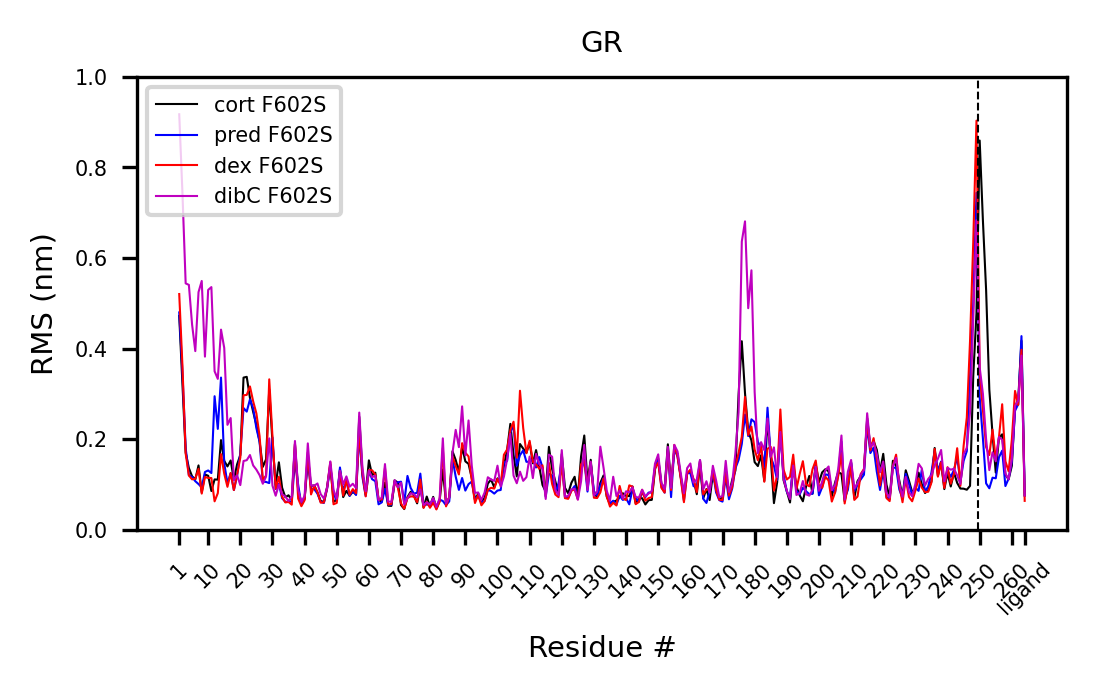

In [240]:
fig, ax = plt.subplots(figsize=(4,2),dpi=300)

#colors=['forestgreen','lime','blue','cornflowerblue']

ax.plot(rmsf_cort_f602s['residue'], rmsf_cort_f602s['value'],color='k',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_pred_f602s['residue'], rmsf_pred_f602s['value'],color='b',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_dex_f602s['residue'], rmsf_dex_f602s['value'],color='r',linestyle='-',linewidth=0.5, marker=None,markersize=.3)
ax.plot(rmsf_dibC_f602s['residue'], rmsf_dibC_f602s['value'],color='m',linestyle='-',linewidth=0.5, marker=None,markersize=.3)


# ax.plot(bins_arr[:-1], df_pred_wt_dt100_y_norm, marker='.',markersize=.1,color='r',linestyle='-')
# ax.plot(bins_arr[:-1], df_dex_wt_dt100_y_norm, marker='.',markersize=.1,color='b',linestyle='-')
# ax.plot(bins_arr[:-1], df_dibC_wt_dt100_y_norm, marker='.',markersize=.1,color='m',linestyle='-')

plt.plot([249.5,249.5],[0,1],'k--',linewidth =0.5)

plt.legend(['cort F602S', 'pred F602S','dex F602S', 'dibC F602S'],loc='upper left',prop={"size":5})
plt.ylabel('RMS (nm)',fontsize=7)
plt.xlabel('Residue #',fontsize=7);

plt.title( 'GR', fontsize = 7);

plt.ylim((0, 1))
#plt.xlim((248, 255))


labels0 = np.insert(np.arange(10,270,10), 0, 1, axis=0)
labels = np.insert(labels0, -1, 264, axis=0)

plt.xticks(labels,rotation = 45,fontsize=5);
plt.yticks(fontsize=5);

a=ax.get_xticks().tolist()
a[-2]='ligand'
ax.set_xticklabels(a);


plt.savefig('rmsf_gr_f602s.pdf', bbox_inches = "tight");